## Observations and Insights 

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results = pd.merge(study_results, mouse_metadata,how ="left", on="Mouse ID")

# Display the data table for preview
combined_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice.
len(combined_results["Mouse ID"].unique())

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = combined_results.loc[combined_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [63]:
# Optional: Get all the data for the duplicate mouse ID. 
 
combined_results.loc[combined_results["Mouse ID"]== "g989"]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [64]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combined_results = combined_results
rmv = combined_results[combined_results["Mouse ID"]== "g989"].index.values
combined_results = combined_results.drop(rmv)
combined_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [65]:
# Checking the number of mice in the clean DataFrame.
Mouse_num_new = combined_results.groupby("Mouse ID")
Mice_num_new =len(Mouse_num_new.count())
Mice_num_new

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

clean_results = combined_results[combined_results["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_results.head()

group_df = clean_results.groupby("Drug Regimen")

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

mean_tumor = clean_results.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mean_tumor

median_tumor = clean_results.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
median_tumor

variance_tumor = group_df["Tumor Volume (mm3)"].var()
variance_tumor

stddev_tumor = group_df["Tumor Volume (mm3)"].std()
stddev_tumor

stderr_tumor = group_df["Tumor Volume (mm3)"].sem()
stderr_tumor




Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [15]:
summary_table = pd.DataFrame({
    "mean":mean_tumor, 
    "median":median_tumor, 
    "var":variance_tumor,
    "std":stddev_tumor, 
    "sem":stderr_tumor})

summary_table


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [19]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

x_axis = np.arange(len(summary_table))
x_axis


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
count_mouse = group_df["Drug Regimen"].count()
count_mouse

Text(0.5, 1.0, 'Data Points for each Treatment')

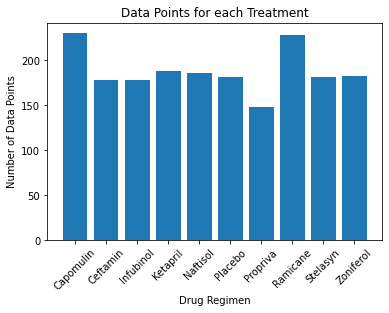

In [31]:
plt.bar(x_axis, count_mouse)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Data Points for each Treatment")

In [32]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
a = clean_results["Drug Regimen"].value_counts()
a

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

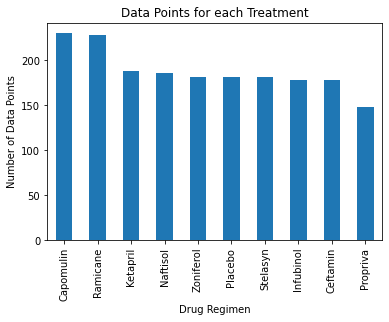

In [34]:
a.plot(kind='bar')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Data Points for each Treatment")

plt.show()

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ["blue", "red"]

gender_percent = mouse_metadata["Sex"].value_counts()
gender_percent

Male      125
Female    124
Name: Sex, dtype: int64

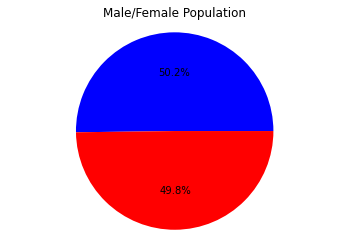

In [36]:
plt.title("Male/Female Population")
plt.pie(gender_percent, colors=colors,autopct="%1.1f%%")
plt.axis("equal")
plt.show()

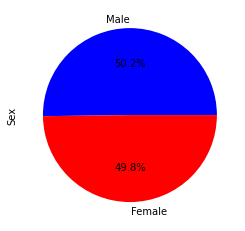

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
b = mouse_metadata["Sex"].value_counts()
b
colors = ["blue", "red"]

b.plot(kind='pie', colors= colors, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [67]:
Haf_dat = combined_results[combined_results["Drug Regimen"] == "Capomulin"]
Haf_dat = Haf_dat.append(combined_results[combined_results["Drug Regimen"] == "Ramicane"])
Haf_dat = Haf_dat.append(combined_results[combined_results["Drug Regimen"] == "Infubinol"])
Haf_dat = Haf_dat.append(combined_results[combined_results["Drug Regimen"] == "Ceftamin"])
Haf_dat

vol = Haf_dat.groupby(["Mouse ID","Timepoint"])
vol2 = vol["Tumor Volume (mm3)"].max()
vol3 = vol2.reset_index()
vol4 = vol3[vol3["Timepoint"] == 45]
vol4

,Mouse ID,Timepoint,Tumor Volume (mm3)
9,a203,45,67.973419
19,a251,45,65.525743
29,a275,45,62.999356
39,a411,45,38.407618
49,a444,45,43.047543
...,...,...,...
773,y769,45,68.594745
783,y793,45,31.896238
793,y865,45,64.729837
803,z578,45,30.638696


In [69]:
Data_test = combined_results
Test_mouse = pd.merge(Data_test, vol4, on = ("Mouse ID","Timepoint"), how = "left", suffixes = ("","(end)"))
Test_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3)(end)
0,b128,0,45.000000,0,Capomulin,Female,9,22,NaN
1,f932,0,45.000000,0,Ketapril,Male,15,29,NaN
2,g107,0,45.000000,0,Ketapril,Female,2,29,NaN
3,a457,0,45.000000,0,Ketapril,Female,11,30,NaN
4,c819,0,45.000000,0,Ketapril,Male,21,25,NaN
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,41.581521
1876,u364,45,31.023923,3,Capomulin,Male,18,17,31.023923
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,61.433892
1878,x773,45,58.634971,4,Placebo,Female,21,30,NaN


In [71]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 


    
    # Determine outliers using upper and lower bounds



In [75]:
# Create empty list to fill with tumor vol data (for plotting)
Tum_data = Test_mouse["Tumor Volume (mm3)"]
Tum_data

0       45.000000
1       45.000000
2       45.000000
3       45.000000
4       45.000000
          ...    
1875    41.581521
1876    31.023923
1877    61.433892
1878    58.634971
1879    72.555239
Name: Tumor Volume (mm3), Length: 1880, dtype: float64

In [76]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Quart = Tum_data.quantile([.25,.5,.75])
Quart
Top_bar = Quart[.75]
Low_bar = Quart[.25]
IQR = Top_bar - Low_bar

Top_out = Top_bar + 1.5*IQR
Low_out = Low_bar - 1.5*IQR
print(f"{Top_out} - {Low_out}")
    
Tum_data.sort_values()

73.31018776874998 - 28.01388733875001


1801    22.050126
1836    23.343598
1615    24.365505
1639    25.472143
1592    26.546993
          ...    
1840    75.113288
1817    75.123690
1761    75.294936
1848    76.668817
1765    78.567014
Name: Tumor Volume (mm3), Length: 1880, dtype: float64

In [77]:
# Locate the rows which contain mice on each drug and get the tumor volumes
Box_cap = Test_mouse[Test_mouse["Drug Regimen"] == "Capomulin"]
Box_cap = Box_cap[["Drug Regimen","Tumor Volume (mm3)(end)"]]
Box_cap = Box_cap.dropna()
Box_cap

Box_ram = Test_mouse[Test_mouse["Drug Regimen"] == "Ramicane"]
Box_ram = Box_ram[["Drug Regimen","Tumor Volume (mm3)(end)"]]
Box_ram = Box_ram.dropna()
Box_ram

Box_inf = Test_mouse[Test_mouse["Drug Regimen"] == "Infubinol"]
Box_inf = Box_inf[["Drug Regimen","Tumor Volume (mm3)(end)"]]
Box_inf = Box_inf.dropna()
Box_inf

Box_cef = Test_mouse[Test_mouse["Drug Regimen"] == "Ceftamin"]
Box_cef = Box_cef[["Drug Regimen","Tumor Volume (mm3)(end)"]]
Box_cef = Box_cef.dropna()
Box_cef

,Drug Regimen,Tumor Volume (mm3)(end)
1752,Ceftamin,59.851956
1753,Ceftamin,64.729837
1754,Ceftamin,68.594745
1759,Ceftamin,61.849023
1777,Ceftamin,67.527482
1797,Ceftamin,67.748662
1842,Ceftamin,64.634949
1843,Ceftamin,62.999356
1845,Ceftamin,68.923185
1849,Ceftamin,61.386660


In [78]:
# add subset 
Box_dat = pd.merge(Box_cap, Box_ram, on = ("Drug Regimen", "Tumor Volume (mm3)(end)"), how = "outer")
Box_dat = pd.merge(Box_dat, Box_inf, on = ("Drug Regimen", "Tumor Volume (mm3)(end)"), how = "outer")
Box_dat = pd.merge(Box_dat, Box_cef, on = ("Drug Regimen", "Tumor Volume (mm3)(end)"), how = "outer")
Box_dat

,Drug Regimen,Tumor Volume (mm3)(end)
0,Capomulin,38.982878
1,Capomulin,34.455298
2,Capomulin,41.483008
3,Capomulin,37.074024
4,Capomulin,32.377357
...,...,...
58,Ceftamin,68.923185
59,Ceftamin,61.386660
60,Ceftamin,64.299830
61,Ceftamin,59.741901


In [79]:
# Determine outliers using upper and lower bounds
Qt = Box_dat["Tumor Volume (mm3)(end)"].quantile([.25,.5,.75])
q3 = Qt[.75]
q1 = Qt[.25]
up_b = q3 + 1.5*(q3-q1)
down_b = q1 - 1.5*(q3-q1)
print(f"{up_b} - {down_b}")
Box_dat.sort_values(by = "Tumor Volume (mm3)(end)")

105.135493215 - -9.513252184999999


,Drug Regimen,Tumor Volume (mm3)(end)
29,Ramicane,22.050126
14,Capomulin,23.343598
12,Capomulin,28.430964
13,Capomulin,28.484033
37,Ramicane,29.128472
...,...,...
55,Ceftamin,67.748662
48,Infubinol,67.973419
52,Ceftamin,68.594745
58,Ceftamin,68.923185


In [ ]:
#No Outliers


[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Ramicane'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Ceftamin')]

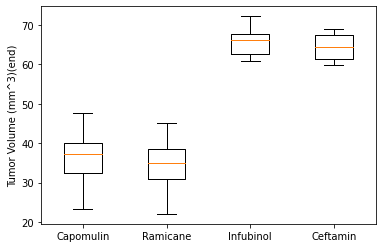

In [80]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, g1 = plt.subplots()
g1.set_ylabel("Tumor Volume (mm^3)(end)")
g1.boxplot([Box_cap["Tumor Volume (mm3)(end)"], Box_ram["Tumor Volume (mm3)(end)"], Box_inf["Tumor Volume (mm3)(end)"], Box_cef["Tumor Volume (mm3)(end)"]])
g1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

## Line and Scatter Plots

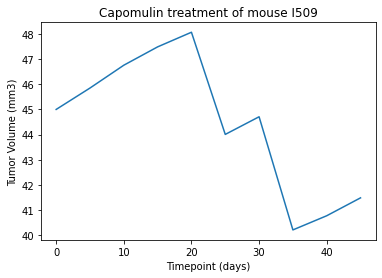

In [50]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_df = combined_results.loc[combined_results["Drug Regimen"] == "Capomulin",:]

capmouse_df = cap_df.loc[clean_results["Mouse ID"] == "l509",:]
capmouse_df.head()

x_axis = capmouse_df["Timepoint"]
y_axis = capmouse_df["Tumor Volume (mm3)"]

plt.title("Capomulin treatment of mouse I509")
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

Text(0.5, 1.0, 'Capomulin Treatment Tumor and Weight Relation')

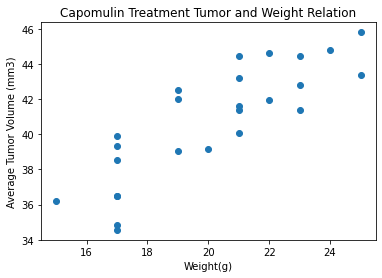

In [51]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_avg = cap_df.groupby(["Mouse ID"]).mean()
plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.title("Capomulin Treatment Tumor and Weight Relation")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [52]:
correlation=round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.84


In [53]:
model=st.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

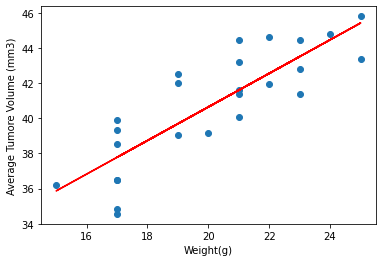

In [55]:
slope = 0.9544396890241045
intercept = 21.552160532685015

y_axis = cap_avg['Weight (g)']*slope+intercept
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'],y_axis,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.show()